# **Visualización**
# AE10. Seaborn Joinplot, Pairplot, Lmplot y Displot

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.2'

In [4]:
# Importamos las librerias adicionales para el manejo numerico y de DataFrame
import numpy as np
import pandas as pd

In [5]:
sns.set(context='notebook',style='darkgrid',palette='dark')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


##<font color='blue'>Graficas Avanzadas</font>
# <font color='blue'>jointplot</font>
Hasta ahora hemos visto gráficos que conocíamos desde su implementación en matplotlib. Seaborn, tiene implementaciones muchos más complejas, encapsulando una gran cantidad de operaciones y permitiendo la gráfica con información univariada y bivariada de forma relativamente sencilla. Para esto podemos utilizar el método `sns.jointplot`, donde por defecto, nos generara un diagrama de dispersión para un par de variables e histogramas para cada una de las variables involucradas. Existen también múltiples tipos de gráficos que se pueden utilizar para la zona bivariada, la cual se puede encontrar en la documentación:

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)


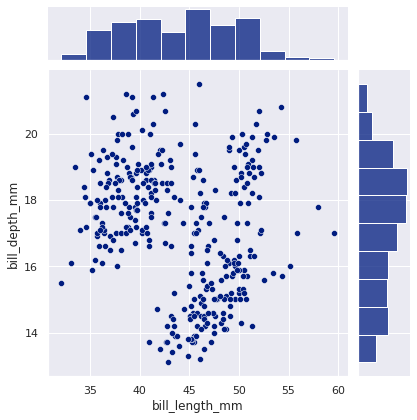

In [8]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_df)
plt.show()

Cabe destacar que si utilizamos el parámetro `hue`, los histogramas cambiaran hacia diagramas KDE:

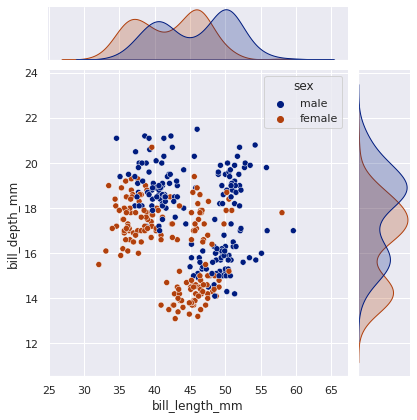

In [9]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_df, hue='sex')
plt.show()

# <font color='blue'>pairplot</font>
Anteriormente en las clases de matplotlib, veíamos que, si queríamos hacer diagramas de dispersión para todas las variables numéricas del set de datos, tendríamos que instanciar los subplots e ir graficando uno a uno las interacciones para cada par de variables. Seaborn por su parte, traer el método `sns.pairplot` el cual realizara una matriz de gráficos de bivariados (por defecto, diagramas de dispersión). En la diagonal por defecto se muestran histogramas, pero estos se pueden cambiar, de la misma forma que los gráficos bivariados. La mayoría de las posibilidades de gráficos bivariados son las mismas que los que existen en jointplot. Para ver todas las posibilidades, ver la documentación:

[Documentación pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)


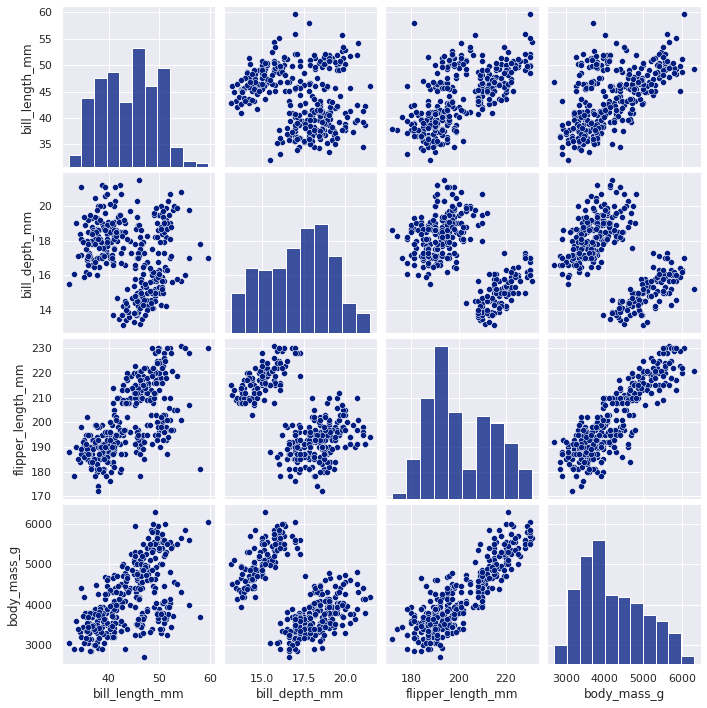

In [10]:
sns.pairplot(data=penguins_df) #Este método como minimo solo necesita el parámetro data
plt.show()

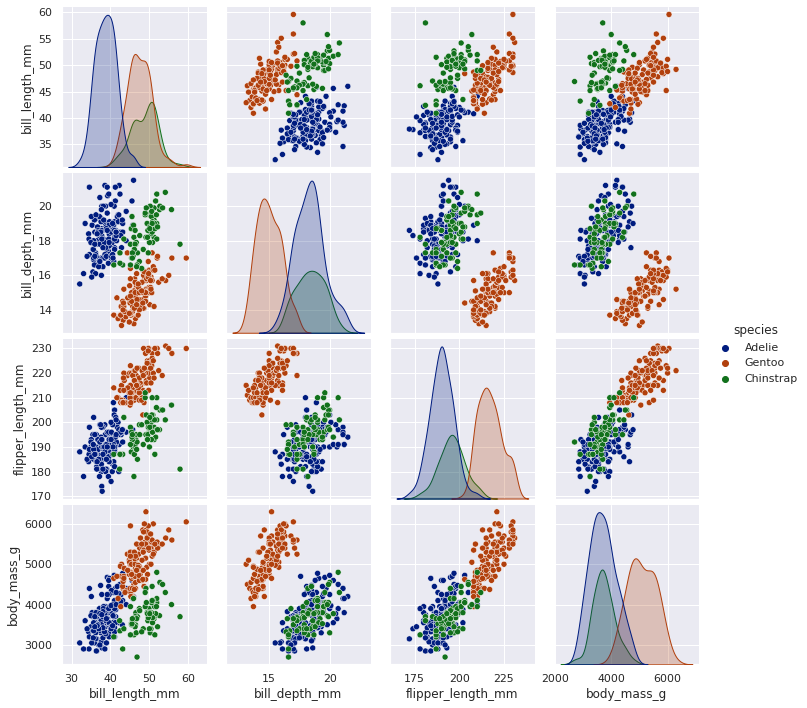

In [11]:
#Si agregamos el parámetro hue, la diagonal cambia de histograma a KDE
sns.pairplot(data=penguins_df, hue='species')
plt.show()

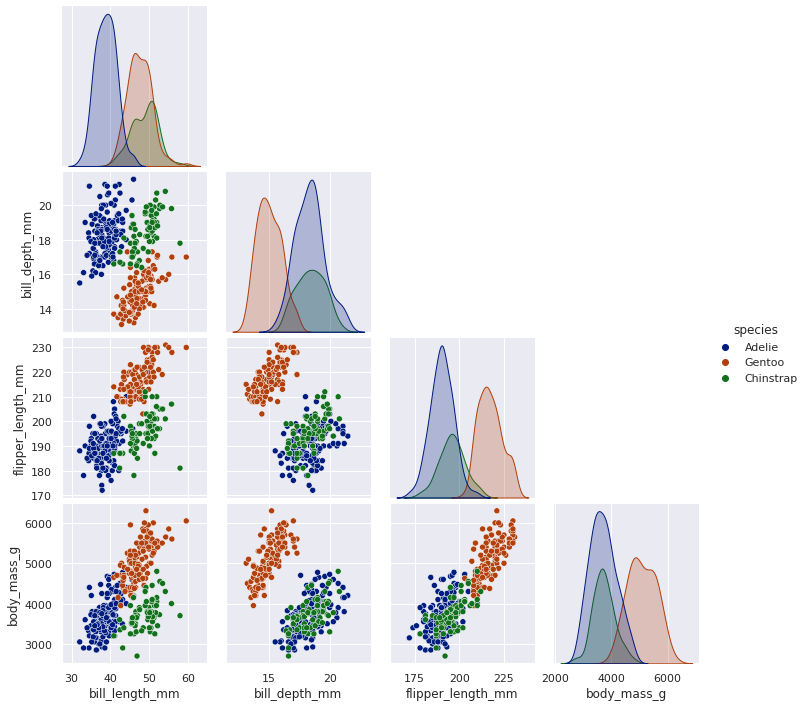

In [12]:
# Y si ocupamos el parámetro corner, solo vamos a mostrar desde la diagonal, hacia abajo.
sns.pairplot(penguins_df, corner=True, hue='species')
plt.show()

# <font color='blue'>regplot</font>
Además de todos estos gráficos, Seaborn presenta un método para poder graficar un diagrama de dispersión, en conjunto con la regresión lineal simple. Para hacer este gráfico, necesitamos llamar al método `sns.regplot()`, sin embargo, este método no es capaz de separar por alguna columna en específico (por ej, utilizando el parámetro `hue`):

[Documentación Regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot)


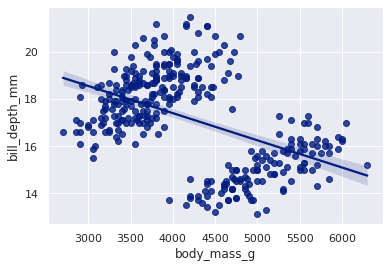

In [13]:
#Regresion lineal simple entre body_mass_g y bill_depth_mm
sns.regplot(x='body_mass_g', y='bill_depth_mm', data=penguins_df)
plt.show()

# <font color='blue'>lmplot</font>
Un método más completo y que permite mayor personalización de los gráficos generados corresponde a `sns.lmplot`. Este método nos permite modelar múltiples relaciones lineales existentes en nuestros datos. En este caso, podemos utilizar los parámetros `hue` para separar por una columna, pero adicionalmente podemos utilizar el parámetro `col` para generar subgráficos dependiendo de los valores existentes en la columna seleccionada. 

[Documentación lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)


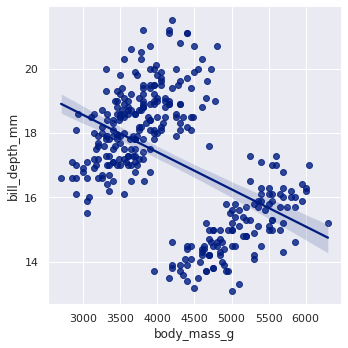

In [14]:
# Generamos un gráfico similar a regplot
sns.lmplot(x='body_mass_g', y='bill_depth_mm', data=penguins_df)
plt.show()

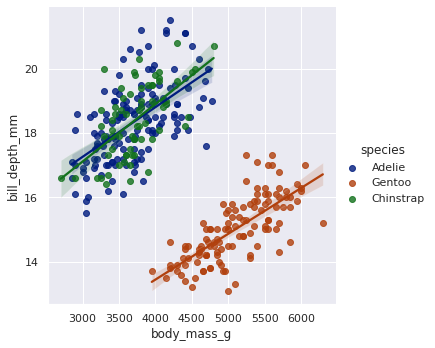

In [15]:
# Pero ahora, podemos ajustar una regresión para cada una de las especies (dado el parámetro hue)
sns.lmplot(x='body_mass_g', y='bill_depth_mm', data=penguins_df, hue="species",)
plt.show()

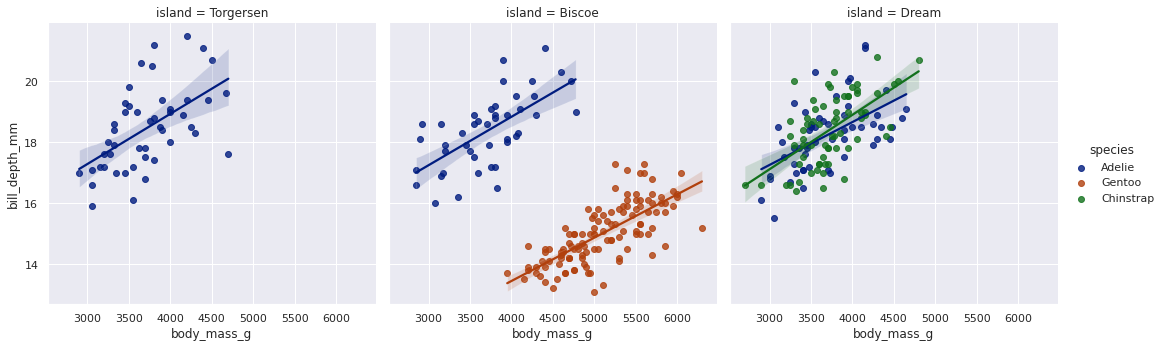

In [16]:
# E inclusive, podemos generar subgráficos con el paràmetro col 
# en este caso, estamos separando por isla y ajustando una regresión por especie
sns.lmplot(x='body_mass_g', y='bill_depth_mm', data=penguins_df, hue="species", col='island')
plt.show()

# <font color='blue'>displot</font>
Finalmente, tenemos el método `sns.displot` que nos permite de igual manera que `sns.lmplot`, generar gráficos y subgráficos con múltiples niveles de separación dependiendo de las columnas que nosotros queramos consultar de nuestro set de datos. En este caso, `sns.displot` está especializado para graficar distribuciones univariadas y bivariadas.

[Documentación distplot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot)


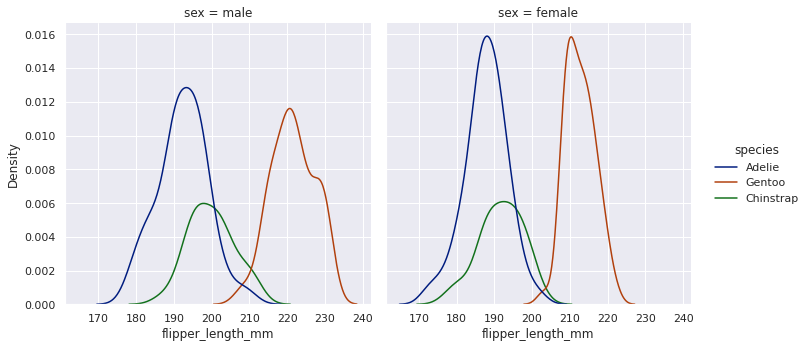

In [17]:
# En este caso, se va a ver la distribución univariada, utilizando KDE, 
# separados por especies y sexo de los pingüinos
sns.displot(data=penguins_df, x="flipper_length_mm", hue="species", col="sex", kind="kde")
plt.show()

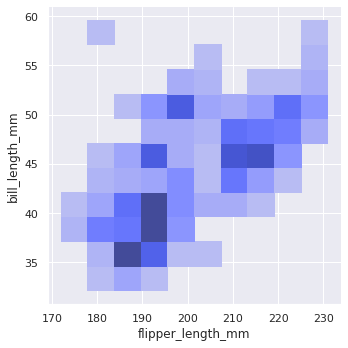

In [18]:
# O en su defecto, un histograma bivariado utilizando el mismo método displot
sns.displot(data=penguins_df, x="flipper_length_mm", y="bill_length_mm")
plt.show()

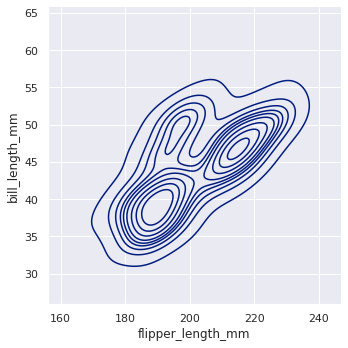

In [19]:
# Alternativamente tenemos los diagramas de KDE bivariados, donde modela de forma similar (pero con superficies)
# la distribución bivariada de dos columnas de nuestro set de datos
sns.displot(x="flipper_length_mm", y="bill_length_mm", kind="kde", data=penguins_df)
plt.show()

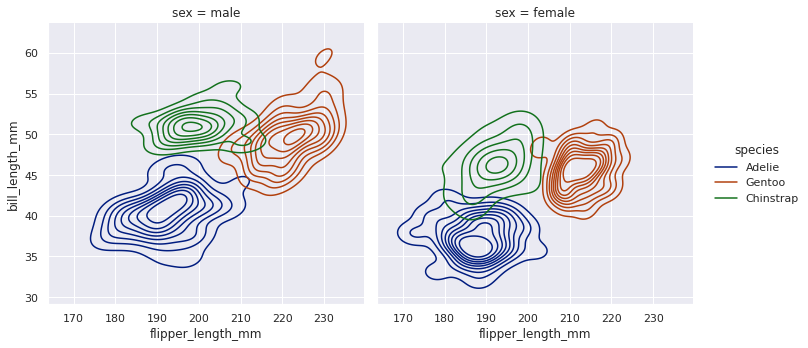

In [20]:
# Y este ultimo gráfico, podemos hacer la misma separación por especies y subgraficos por columna sexo de los pinguinos
sns.displot(x="flipper_length_mm", y="bill_length_mm", hue='species', kind="kde", col="sex", data=penguins_df)
plt.show()

## <font color='green'>Actividad 1:</font>

Para finalizar con las dinámicas se van a implementar los gráficos avanzados para los dos sets de datos que hemos estado trabajando  clima y precio de casas (VD04.csv y VD08.csv). En este caso, se pide que se utilice como color algunas de las variables categóricas de los sets de datos (siempre y cuando, el método de graficar lo permita). 

Para **cada set de datos**:

- 1 jointplot
- 1 pairplot
- 1 regplot
- 1 lmplot
- 1 displot


In [21]:
weather_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD04.csv").dropna()
weather_df.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [55]:
houses_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD08.csv").dropna()
houses_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Datos de temperatura

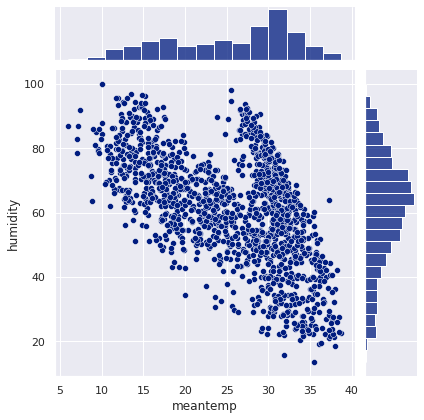

In [23]:
sns.jointplot(x='meantemp',y='humidity', data=weather_df)
plt.show()

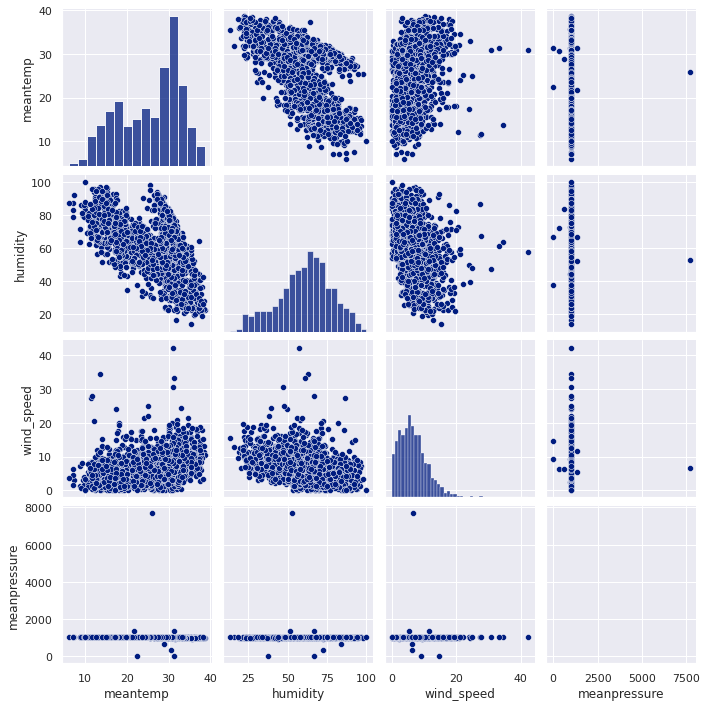

In [29]:
sns.pairplot(data=weather_df) 
plt.show()

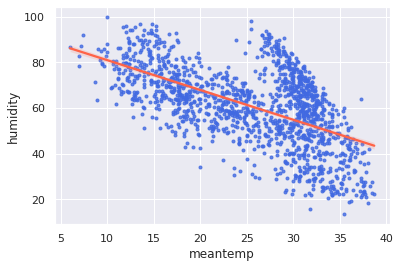

In [39]:
sns.regplot(x='meantemp',y='humidity', data=weather_df,scatter_kws={"color": "royalblue"}, line_kws={"color": "tomato"}, marker=".") 
plt.show()

Es posible realizar lmplot y displot solo para un par de variables; y no es posible clasificar por otra variable, ya que todas son de númericas. 

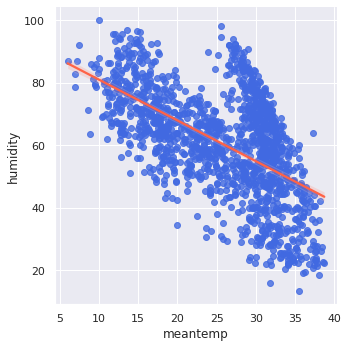

In [47]:
sns.lmplot(x='meantemp',y='humidity', data=weather_df,scatter_kws={"color": "royalblue"}, line_kws={"color": "tomato"})
plt.show()

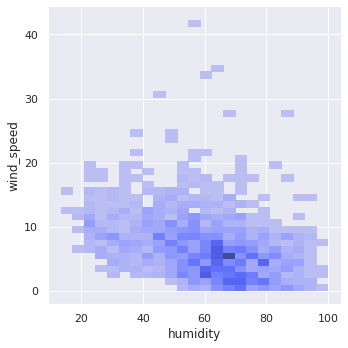

In [61]:
sns.displot(x="humidity", y="wind_speed", data=weather_df)
plt.show()

# Datos de precios de viviendas

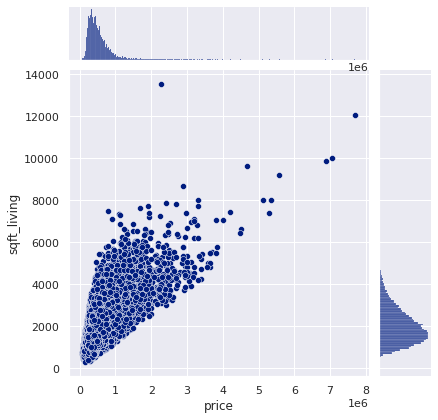

In [56]:
sns.jointplot(x='price',y='sqft_living', data=houses_df)
plt.show()

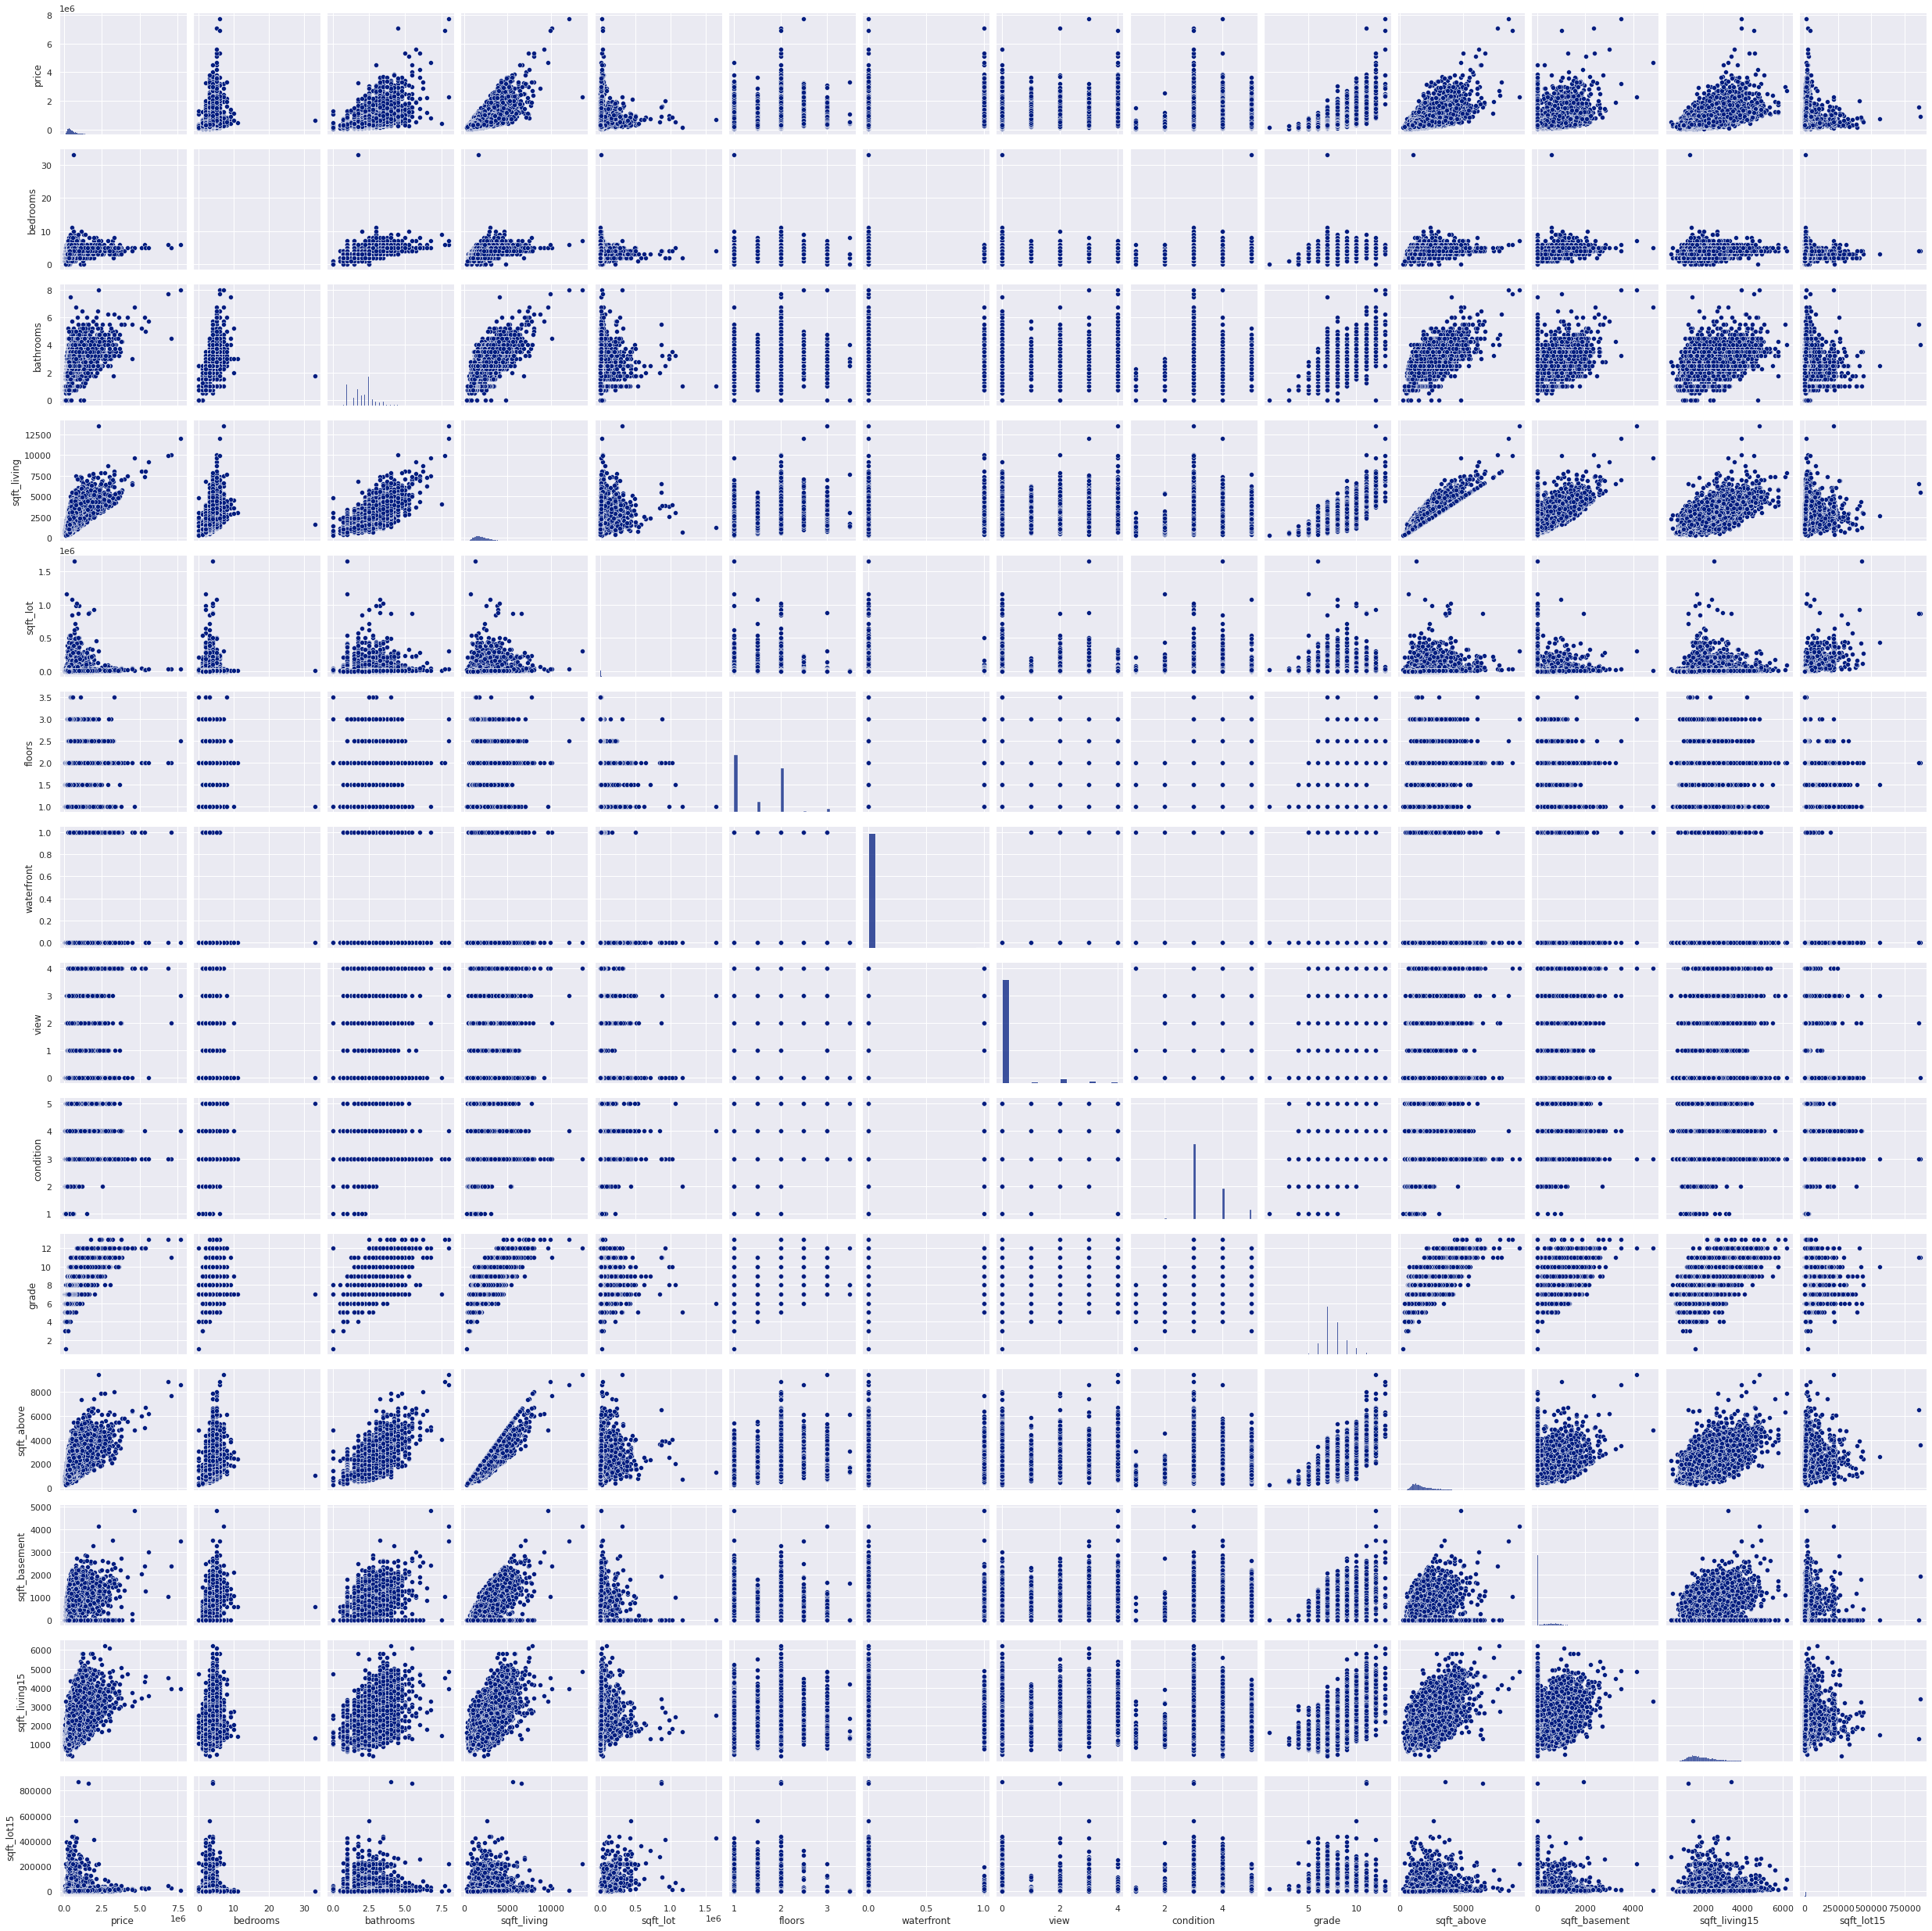

In [57]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

sns.pairplot(data=houses_df[cols]) 
plt.show()


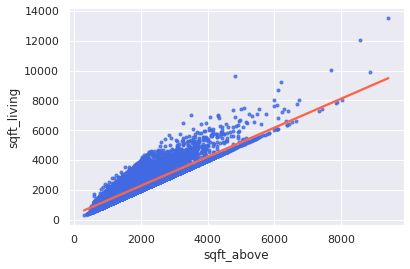

In [58]:
sns.regplot(x='sqft_above',y='sqft_living', data=houses_df,scatter_kws={"color": "royalblue"}, line_kws={"color": "tomato"}, marker=".") 
plt.show()

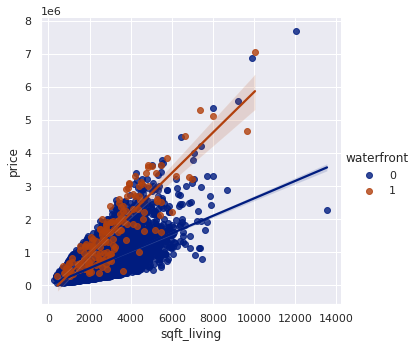

In [59]:
#waterfront, view y condition son variables cualitativas (boolean o alguna otra característica)
sns.lmplot(y='price', x='sqft_living', data=houses_df, hue="waterfront",)
plt.show()

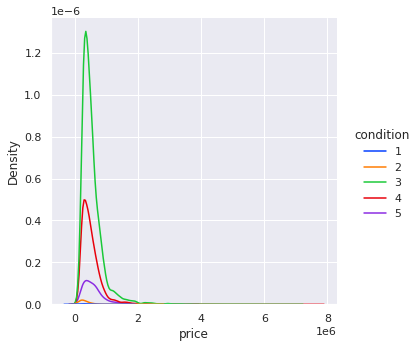

In [76]:
displot = sns.displot(x="price", data=houses_df, hue="condition", kind="kde", palette='bright')
plt.show()

<font color='green'>Fin actividad 1</font>